In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("AIB_History_Training_2014-2020.xlsx", sheet_name='HistoricalTransactions')

In [3]:
## Check Shape
print("Shape of dataset: ", df.shape)

Shape of dataset:  (67731, 13)


In [4]:
## Check column names
print("Columns: ", df.columns.tolist())

Columns:  ['FileFolder', 'FileName', 'Report_Title', 'Report_RunDate', 'Report_AsOfDate', 'Report_TransactionEffectiveDate', 'Currency', 'Institution', 'Branch', 'TransactionGroup', 'TransactionCode', 'TransactionBackdateFlag', 'TransactionAmount']


In [5]:
## Check data types
print("Data types: ", df.dtypes)

Data types:  FileFolder                                 object
FileName                                   object
Report_Title                               object
Report_RunDate                     datetime64[ns]
Report_AsOfDate                    datetime64[ns]
Report_TransactionEffectiveDate    datetime64[ns]
Currency                                   object
Institution                                 int64
Branch                                      int64
TransactionGroup                           object
TransactionCode                            object
TransactionBackdateFlag                    object
TransactionAmount                         float64
dtype: object


In [6]:
## check for missing values
print("Missing values: ", df.isnull().sum())

Missing values:  FileFolder                         0
FileName                           0
Report_Title                       0
Report_RunDate                     0
Report_AsOfDate                    0
Report_TransactionEffectiveDate    0
Currency                           0
Institution                        0
Branch                             0
TransactionGroup                   0
TransactionCode                    0
TransactionBackdateFlag            0
TransactionAmount                  0
dtype: int64


In [7]:
## Explore date columns
print("Report_RunDate range: ", df['Report_RunDate'].dt.date.min()," - ", df['Report_RunDate'].dt.date.max())
print("Report_AsOfDate range: ", df['Report_AsOfDate'].dt.date.min()," - ", df['Report_AsOfDate'].dt.date.max())
print("Report_TransactionEffectiveDate range: ", df['Report_TransactionEffectiveDate'].dt.date.min()," - ", df['Report_TransactionEffectiveDate'].dt.date.max())

Report_RunDate range:  2014-01-01  -  2021-01-04
Report_AsOfDate range:  2013-12-31  -  2020-12-31
Report_TransactionEffectiveDate range:  2013-12-30  -  2020-12-31


In [8]:
## Explore transaction groups and codes
print("Unique TransactionGroups:", df['TransactionGroup'].nunique())
print("Unique TransactionCodes:", df['TransactionCode'].nunique())
print("TransactionGroup Distribution:\n", df['TransactionGroup'].value_counts())
print("TransactionCode Distribution:\n", df['TransactionCode'].value_counts())

Unique TransactionGroups: 2
Unique TransactionCodes: 56
TransactionGroup Distribution:
 TransactionGroup
C    43402
D    24329
Name: count, dtype: int64
TransactionCode Distribution:
 TransactionCode
BC    26003
AS     8280
FT     4295
ET     3429
ES     2623
TM     2597
BT     2548
TX     2248
QC     1812
RM     1657
CP     1534
SD     1250
DP     1229
OP     1117
DM     1030
FC      802
FA      733
BF      723
UR      662
XR      632
BA      368
CM      209
DA      191
FX      171
UC      110
IR      100
OF       85
DD       85
PP       85
TC       85
LS       85
FE       84
E1       84
AO       82
DI       80
MD       79
ER       64
BL       62
EA       61
E2       54
EF       53
E3       33
TT       33
EB       32
TA       31
CD       25
LI       23
PS       18
FF       15
XE       12
AT        9
DV        6
RI        5
OD        4
XC        2
ML        2
Name: count, dtype: int64


In [9]:
## Analyze transaction amount
print("TransactionAmount Summary:\n", df['TransactionAmount'].apply(abs).describe())


TransactionAmount Summary:
 count    67731.000000
mean      1949.131636
std       3153.737524
min          0.000000
25%        359.200060
50%       1023.409378
75%       2373.025426
max      43170.159194
Name: TransactionAmount, dtype: float64


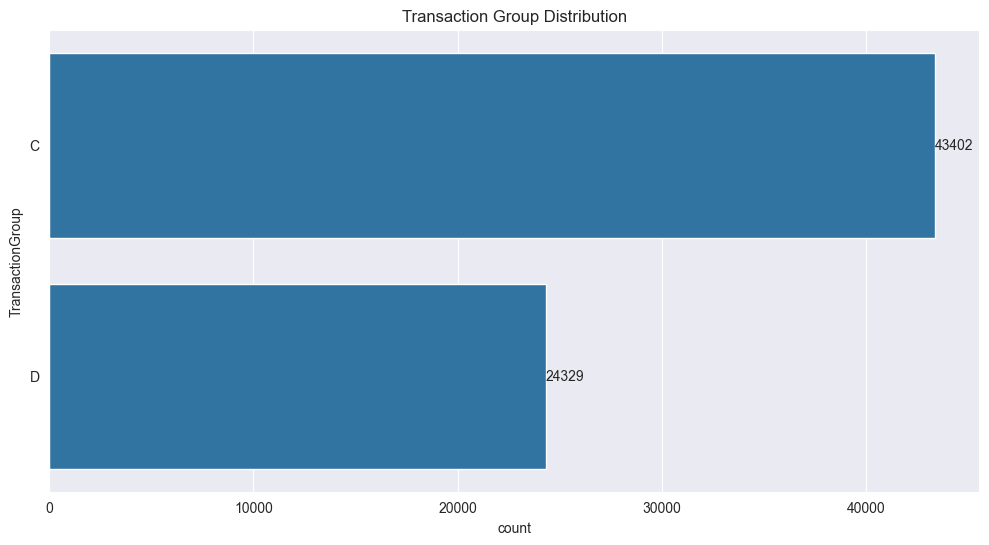

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='TransactionGroup', data=df, order=df['TransactionGroup'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Transaction Group Distribution')
plt.show()